# Drive Init

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/Colab Notebooks/Datasets/Hackerearth_Dance_forms/

/content/drive/My Drive/Colab Notebooks/Datasets/Hackerearth_Dance_forms


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Image Augmentations
There are only 364 images in the training set. It will hard to get a good model using just those. We will apply augmentations, to improve the accuracy.

In [ ]:
import os
import cv2
from PIL import Image

Create new directories to store processed test and train images.

In [ ]:
os.mkdir('final_train')
os.mkdir('final_test')

Create two functions:
*   resize : To resize all images to specification.
*   add_padding: To add padding to non square images.

In [ ]:
def resize(s,src,des):
  size = s,s
  for fname in os.listdir(src):
    spath = os.path.join(src+fname)
    dpath = os.path.join(des+fname)
    if os.path.isfile(spath):
      image = Image.open(spath)
      image.thumbnail(size, Image.ANTIALIAS)
      image.save(dpath)

In [ ]:
def add_padding(s,src,des):
  for fname in os.listdir(src):
    spath = os.path.join(src+fname)
    dpath = os.path.join(des+fname)
    if os.path.isfile(spath):
      im = Image.open(spath)
      desired_size = s
      old_size = im.size
      ratio = float(desired_size)/max(old_size)
      new_size = tuple([int(x*ratio) for x in old_size])
      im = im.resize(new_size, Image.ANTIALIAS)
      new_im = Image.new("RGB", (desired_size, desired_size))
      new_im.paste(im, ((desired_size-new_size[0])//2,(desired_size-new_size[1])//2))
      new_im.save(dpath)

In [ ]:
resize(512,'train/','final_train/')
add_padding(512,'final_train/','final_train/')
resize(512,'test/','final_test/')
add_padding(512,'final_test/','final_test/')

A look at the train dataset.

In [ ]:
import pandas as pd
train = pd.read_csv('train.csv')
train.sample(2)

,Image,target
355,5.jpg,kathak
90,516.jpg,odissi


Create target directories for all classes.

In [ ]:
dance_forms = train['target'].unique().tolist()
for i in dance_forms:
  os.mkdir('final_train/'+i)

In [ ]:
import shutil
path = 'final_train/'
for i in range(len(train)):
  if os.path.isfile(path + train['Image'][i]):
    shutil.move(path + train['Image'][i], path + train['target'][i] + '/' + train['Image'][i])

Functions for image augmentations.

In [ ]:
import random
from scipy import ndarray
import skimage as sk
from skimage import transform, util, io

def random_rotation(image_array: ndarray, lb, ub):
  random_degree = random.uniform(lb, ub)
  return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
  return sk.util.random_noise(image_array)

def horizontal_flip(image_array: ndarray):
  return image_array[:, ::-1]

def blur_image(image):
  return cv2.GaussianBlur(image, (9,9),0)

def warp_shift(image): 
  transform = sk.transform.AffineTransform(translation=(10, 10))
  warp_image = sk.transform.warp(image, transform, mode="wrap")
  return warp_image

def gray(image):
  return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

Perform augmentations on all images. 

The following code will create 6 new images from a single one.

In [ ]:
for i in dance_forms:
  aug = 0
  folder_path = os.path.join('final_train/',i+'/')
  for fname in os.listdir(folder_path):
    if os.path.isfile(folder_path + fname):
      image_to_transform = sk.io.imread(folder_path + fname)
      #1
      transformed_image = horizontal_flip(image_to_transform)
      transformed_image = blur_image(transformed_image)
      aug += 1
      io.imsave(folder_path + 'aug' + str(aug) + '.jpg', transformed_image)
      #2
      transformed_image = random_rotation(image_to_transform, -45, 0)
      transformed_image = random_noise(transformed_image)
      aug += 1
      io.imsave(folder_path + 'aug' + str(aug) + '.jpg', transformed_image)
      #3
      transformed_image = horizontal_flip(transformed_image)
      transformed_image = blur_image(transformed_image)
      aug += 1
      io.imsave(folder_path + 'aug' + str(aug) + '.jpg', transformed_image)
      #4
      transformed_image = random_rotation(image_to_transform, 0 ,45)
      transformed_image = random_noise(transformed_image)
      aug += 1
      io.imsave(folder_path + 'aug' + str(aug) + '.jpg', transformed_image)
      #5
      transformed_image = horizontal_flip(transformed_image)
      transformed_image = blur_image(transformed_image)
      aug += 1
      io.imsave(folder_path + 'aug' + str(aug) + '.jpg', transformed_image)
      #6
      transformed_image = gray(image_to_transform)
      transformed_image = warp_shift(transformed_image)
      aug += 1
      io.imsave(folder_path + 'aug' + str(aug) + '.jpg', transformed_image)

A look at an image and some of its augmentations.

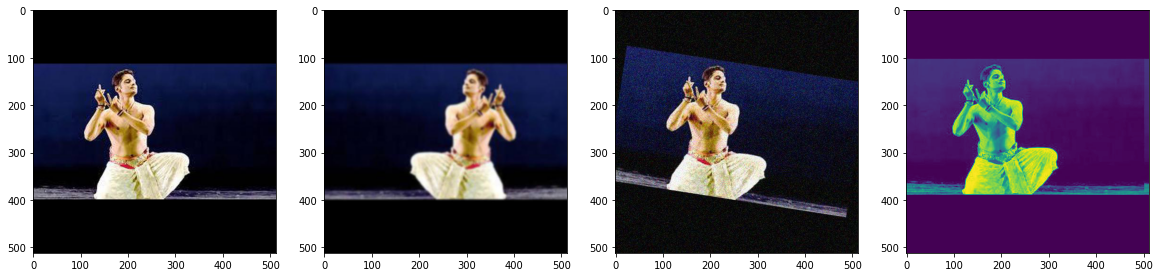

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
rcParams['figure.figsize'] = 20 ,8
img_A = mpimg.imread('final_train/bharatanatyam/115.jpg')
img_B = mpimg.imread('final_train/bharatanatyam/aug1.jpg')
img_C = mpimg.imread('final_train/bharatanatyam/aug2.jpg')
img_D = mpimg.imread('final_train/bharatanatyam/aug6.jpg')
fig, ax = plt.subplots(1,4)
ax[0].imshow(img_A);
ax[1].imshow(img_B);
ax[2].imshow(img_C);
ax[3].imshow(img_D);

# Keras Model

Build a CNN model from scratch.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


Process train and test data.

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0, zoom_range = 0.2, horizontal_flip = False)
training_set = train_datagen.flow_from_directory('final_train', target_size = (512,512), class_mode = 'categorical')

Model creation

In [ ]:
import tensorflow as tf
cnn = tf.keras.models.Sequential()

Layer 1

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = (512,512,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

Layer 2

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 4, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

Full Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))

Output layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units = 8, activation = 'softmax'))

Compliling and fitting

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
cnn.fit(x = training_set, epochs = 20)

Prediction

In [ ]:
d = training_set.class_indices
d = {v: k for k, v in d.items()}

In [ ]:
import pandas as pd
test = pd.read_csv('test.csv')

In [ ]:
import numpy as np
from keras.preprocessing import image
ans = []
for i in range(len(test)):
  path = 'final_test/' + test.loc[i, 'Image']
  img = image.load_img(path, target_size = (256,256))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  result = cnn.predict(img, use_multiprocessing = True)
  for j in range(8):
    if result[0][j] == 1:
      test.loc[i, 'target'] = d.get(j)
      break

In [ ]:
test.to_csv('submission2.csv',index = False)

Even with the augmentations, the prediction was 52% accurate on the leaderboard.

# Fast AI Model
We use a pre trained model to get better results and save time on training.

In [ ]:
from fastai import *
from fastai.vision import *
from fastai.metrics import accuracy, error_rate
defaults.device = torch.device('cuda')

Process images for training.

In [ ]:
path = Path('final_train')
test_path = '/content/drive/My Drive/Colab Notebooks/Datasets/Hackerearth_Dance_forms/final_test'
data = ImageDataBunch.from_folder(path, test = test_path, ds_tfms = get_transforms(do_flip = False, flip_vert = False, max_rotate = 0, max_zoom = 1.2, max_lighting = 0.2), valid_pct=0, size=512, bs = 8).normalize(imagenet_stats)

Choose resnet50 as the pre trained model and create a CNN learner.

In [ ]:
cnn = create_cnn(data, models.resnet50, metrics = [accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


Fit images

In [ ]:
cnn.save('untrained')
cnn.fit_one_cycle(8)

Find optimal learning rate and train again to decrease loss.

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


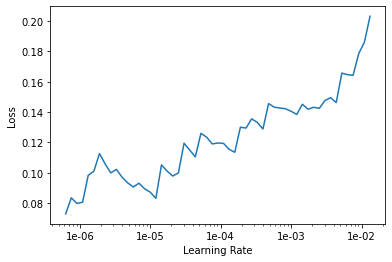

In [ ]:
cnn.lr_find()
cnn.recorder.plot()

In [ ]:
cnn.save('stage1')
cnn.fit_one_cycle(4, max_lr = slice(1e-6, 1e-5))

We were able to bring the loss down to 0.131925 from 1.622619

Predict on test images

In [ ]:
cnn.data=data
preds, y = cnn.get_preds(ds_type=DatasetType.Test)
preds = np.argmax(preds, axis = 1)
preds_classes = [data.classes[i] for i in preds]

In [ ]:
import os
submission = pd.DataFrame({ 'Image': os.listdir('final_test/'), 'target': preds_classes })
submission.to_csv('Submissions/submission5.csv',index = False)